# Getting started with Google Colab

If you are using Google Colab, run the following two code cells.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
%cd gdrive/MyDrive/AMLD-EPFL2022-workshop-fair-algorithms

# Dataset

## Dataset information

This dataset classifies people described by a set of attributes as good or bad credit risks.

- Dataset name: Statlog (German Credit Data) Data Set
- Download data: https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/
- Data Set Description: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29


## Dataset description

### Sensitive attribute (A)
- sex: gender (0 = male; 1 = female)

### Features (X)
- status: status of the debtor's checking account with the bank (categorical)
- duration: credit duration in months (quantitative)
- credit_history: history of compliance with previous or concurrent credit contracts (categorical)
- purpose: purpose for which the credit is needed (categorical)
- credit_amount: credit amount in DM (quantitative)
- savings: debtor's savings (categorical)
- employment: duration of debtor's employment with current employer (ordinal; discretized quantitative)
- investment_as_income_percentage: credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative)
- other_debtors: Is there another debtor or a guarantor for the credit? (categorical)
- residence_since: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative)
- property: the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3
or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
sparkont. (ordinal)
- age: age in years (quantitative)
- installment_plans: installment plans from providers other than the credit-giving bank (categorical)
- housing: type of housing the debtor lives in (categorical)
- number_of_credits: number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative); contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.
- skill_level: quality of debtor's job (ordinal)
- people_liable_for: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary,
discretized quantitative)
- telephone: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s)
- foreign_worker: Is the debtor a foreign worker? (binary)

### Target variable (Y)

- credit (0 = Bad, 1 = Good): Has the credit contract been complied with good or bad?

## Train classifier

In [1]:
from train_clf import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df, scores, y = train(german_credit)

The model has been trained.
Accuracy: 0.8
Accuracy: 0.8
Scores and y are saved in json format to output/german_credit


In [3]:
df.head()

,status,month,credit_history,purpose,credit_amount,savings,employment,investment_as_income_percentage,sex,other_debtors,...,property,age,installment_plans,housing,number_of_credits,skill_level,people_liable_for,telephone,foreign_worker,credit
0,A11,6,A34,A43,1169,A65,A75,4,0,A101,...,A121,adult,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,1,A101,...,A121,youth,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,0,A101,...,A121,adult,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,0,A103,...,A122,adult,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,0,A101,...,A124,adult,A143,A153,2,A173,2,A191,A201,0


In [4]:
df.shape

(1000, 21)

# Exercises

## Task 1: Score distributions

### Task 1.a : visualize the overall score distribution

In [5]:
# solution task 1.a
import plotly.express as px
all_scores = pd.Series([*scores["scores_group1"], *scores["scores_group2"]])
all_y = pd.Series([*y["y_group1"], *y["y_group2"]])
px.histogram(all_scores)

### Task 1.b : visualize the score distribution for men

### Task 1.c : visualize the score distribution for women

In [6]:
# solution task 1.b & 1.c
scores_group1 = pd.Series(scores["scores_group1"])
scores_group2 = pd.Series(scores["scores_group2"])
scores_df = pd.DataFrame(dict(
    series =np.concatenate((["Group 1: Men"]*len(scores_group1), ["Group 2: Women"]*len(scores_group2))), 
    scores =np.concatenate((scores_group1,scores_group2))
))
px.histogram(scores_df, x="scores", color="series", barmode="overlay")

In [7]:
y_group1 = pd.Series(y["y_group1"])
y_group2 = pd.Series(y["y_group2"])

y_group1_index_1 = y_group1 == 1
y_group1_index_0 = y_group1 == 0

scores_by_y_df_men = pd.DataFrame(dict(
    series = np.concatenate((["Men Y=0"]*len(scores_group1[y_group1_index_0]), ["Men Y=1"]*len(scores_group1[y_group1_index_1]))), 
    scores = np.concatenate((scores_group1[y_group1_index_0],scores_group1[y_group1_index_1]))
))
px.histogram(scores_by_y_df_men, x="scores", color="series", barmode="overlay")

In [8]:
y_group2_index_1 = y_group2 == 1
y_group2_index_0 = y_group2 == 0

scores_by_y_df_women = pd.DataFrame(dict(
    series = np.concatenate((["Women Y=0"]*len(scores_group2[y_group2_index_0]), ["Women Y=1"]*len(scores_group2[y_group2_index_1]))), 
    scores = np.concatenate((scores_group2[y_group2_index_0],scores_group2[y_group2_index_1]))
))
px.histogram(scores_by_y_df_women, x="scores", color="series", barmode="overlay")

## Task 2: Optimal unconstrained decision rule

### Task 2.a : compute the optimal decision rule based on the following utility values (in 1K CHF)

- u_11: decision maker's utility for granting a loan to an individual who repays
- u_10: decision maker's utility for granting a loan to an individual who defaults
- u_01: decision maker's utility for not granting a loan to an individual who would repay
- u_00: decision maker's utility for not granting a loan to an individual who would default

In [9]:
# solution task 2

u_11 = 1000
u_10 = -5000
u_01 = 0
u_00 = 0

optimal_unconstrained_threshold = -(u_10 - u_00) / ( (u_11 - u_01) - (u_10 - u_00) )
print("From the persepective of the bank, it is optimal to grant a loan to all individuals with a repayment probability p >", optimal_unconstrained_threshold)

From the persepective of the bank, it is optimal to grant a loan to all individuals with a repayment probability p > 0.8333333333333334


### Task 2.b : add a visualization of the optimal decision rule to the score distribution plot of task 1.a

In [10]:
# solution task 2.b

scores_df = pd.DataFrame(dict(
    series =np.concatenate((["Group 1: Men"]*len(scores_group1), ["Group 2: Women"]*len(scores_group2))), 
    scores =np.concatenate((scores_group1,scores_group2))
))
fig = px.histogram(scores_df, x="scores", color="series", barmode="overlay")
fig.add_vline(x=optimal_unconstrained_threshold, line_width=3, line_dash="dash", line_color="green")

## Task 3: (Group-specific) Outcomes

### Task 3.a : compute the confusion matrix that result from applying this optimal decision rule for the entire population

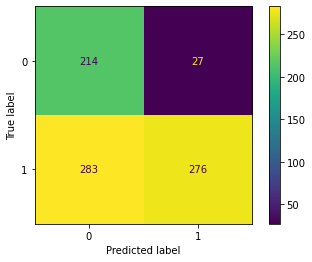

In [11]:
# solution task 3.a

from sklearn.metrics import ConfusionMatrixDisplay
decisions = pd.Series(np.where(all_scores > optimal_unconstrained_threshold, 1, 0))
ConfusionMatrixDisplay.from_predictions(all_y, decisions)

### Task 3.b : compute the confusion matrix that result from applying this optimal decision rule for men

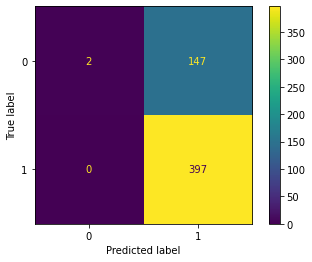

In [12]:
# solution task 3.b
decisions_men = pd.Series(np.where(scores_group1 > 0.1, 1, 0))
ConfusionMatrixDisplay.from_predictions(y_group1, decisions_men)

### Task 3.b : compute the confusion matrix that result from applying this optimal decision rule for women

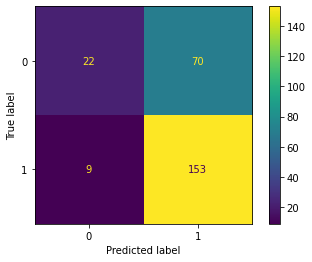

In [13]:
# solution task 3.b
decisions_women = pd.Series(np.where(scores_group2 > 0.3, 1, 0))
ConfusionMatrixDisplay.from_predictions(y_group2, decisions_women)

## Task 4: Qualitative questions

Now answer the following questions:
- Do the score distributions look as expected?
- Based on this brief analysis of the result of the prediction model: do you think that there might be any fairness issue(s) with regard to gender?

## Bonus task: further data exploration

### Bonus task: explore the data further and analyze whether the prediction model works better for men then for women or vice versa.

In [14]:
print("Average credit score probability:", df.credit.sum() / len(df.credit))
print("Average credit score probability MEN:", df[df.sex==0].credit.sum() / len(df[df.sex==0].credit))
print("Average credit score probability WOMEN:", df[df.sex==1].credit.sum() / len(df[df.sex==1].credit))

Average credit score probability: 0.7
Average credit score probability MEN: 0.7231884057971014
Average credit score probability WOMEN: 0.6483870967741936


In [15]:
pd.crosstab(df.sex, df.credit)

credit,0,1
sex,,
0,191,499
1,109,201


<AxesSubplot:xlabel='sex'>

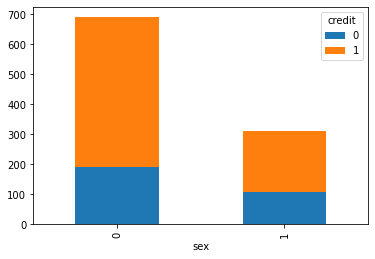

In [16]:
gender = df.groupby(['sex', 'credit']).size().unstack(1)
gender.plot(kind='bar', stacked = True)

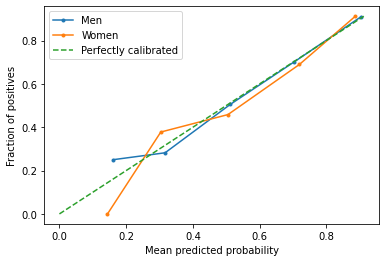

In [17]:
from sklearn.calibration import calibration_curve
# reliability diagram
fop_men, mpv_men = calibration_curve(y_group1, scores_group1, n_bins=5, normalize=False)
# plot perfectly calibrated
# plot calibrated reliability
plt.plot(mpv_men, fop_men, marker='.', label="Men")
fop_women, mpv_women = calibration_curve(y_group2, scores_group2, n_bins=5, normalize=False)
plt.plot(mpv_women, fop_women, marker='.', label="Women")

plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")

max_value = max(*fop_women, *mpv_women, *fop_men, *mpv_men)
min_value = min(*fop_women, *mpv_women, *fop_men, *mpv_men)
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', label="Perfectly calibrated")
plt.legend()